In [27]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
df=pd.read_csv('data.csv')
df

,CountyName,State,Latitude,Longitude,Date,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,...,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,Adams,Washington,46.929839,-118.352109,11/30/2014 0:00,18.61,-3.01,0.00,6.77,0.69,...,0,1027.95,23.93,6.96,10.00,9,3.80,136.179718,0,35.6
1,Adams,Washington,47.150327,-118.958859,11/30/2014 0:00,19.67,-0.74,0.00,6.66,0.65,...,0,1028.26,25.88,8.71,10.00,352,6.03,135.697540,0,35.6
2,Adams,Washington,46.811686,-118.695237,11/30/2014 0:00,20.66,-0.14,0.00,6.55,0.67,...,0,1028.29,24.67,8.26,10.00,25,3.59,135.676956,0,35.6
3,Adams,Washington,47.162342,-118.699677,11/30/2014 0:00,19.69,-2.66,0.03,7.32,0.69,...,0,1027.74,25.48,8.10,10.00,1,5.18,135.005798,0,35.6
4,Adams,Washington,47.157512,-118.434056,11/30/2014 0:00,18.82,-3.04,0.04,7.62,0.70,...,0,1027.16,24.83,8.32,9.99,5,4.69,134.803864,0,35.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182544,Miami,Kansas,38.693595,-94.671846,6/3/2015 0:00,75.44,64.29,0.13,62.74,0.84,...,0,1013.01,75.44,64.29,9.31,133,6.26,134.803101,185,50.1
182545,Miami,Kansas,38.603699,-94.992247,6/3/2015 0:00,75.47,64.49,0.13,62.83,0.84,...,0,1012.99,75.47,64.49,9.29,132,6.29,133.913879,185,50.1
182546,Miami,Kansas,38.580826,-94.794660,6/3/2015 0:00,75.40,64.43,0.13,62.77,0.84,...,0,1013.01,75.40,64.43,9.28,132,6.27,129.938950,185,50.1
182547,Miami,Kansas,38.564866,-94.748021,6/3/2015 0:00,75.35,64.44,0.13,62.74,0.84,...,0,1013.01,75.35,64.44,9.28,132,6.26,129.938950,185,50.1


In [30]:
# drop unwanted columns.
df = df.drop(['CountyName'], axis=1)
df = df.drop(['State'], axis=1)
df = df.drop(['Date'], axis=1)
df = df.drop(['cloudCover'], axis=1)
df = df.drop(['dewPoint'], axis=1)
df = df.drop(['precipIntensity'], axis=1)
df.head()

,Latitude,Longitude,apparentTemperatureMax,apparentTemperatureMin,humidity,precipIntensityMax,precipProbability,precipAccumulation,precipTypeIsRain,precipTypeIsSnow,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,46.929839,-118.352109,18.61,-3.01,0.69,0.0,0.0,0.0,0,0,0,1027.95,23.93,6.96,10.00,9,3.80,136.179718,0,35.6
1,47.150327,-118.958859,19.67,-0.74,0.65,0.0,0.0,0.0,0,0,0,1028.26,25.88,8.71,10.00,352,6.03,135.697540,0,35.6
2,46.811686,-118.695237,20.66,-0.14,0.67,0.0,0.0,0.0,0,0,0,1028.29,24.67,8.26,10.00,25,3.59,135.676956,0,35.6
3,47.162342,-118.699677,19.69,-2.66,0.69,0.0,0.0,0.0,0,0,0,1027.74,25.48,8.10,10.00,1,5.18,135.005798,0,35.6
4,47.157512,-118.434056,18.82,-3.04,0.70,0.0,0.0,0.0,0,0,0,1027.16,24.83,8.32,9.99,5,4.69,134.803864,0,35.6


In [31]:
df = df.drop(['precipIntensityMax'], axis=1)
df = df.drop(['precipProbability'], axis=1)
df = df.drop(['precipAccumulation'], axis=1)
df = df.drop(['precipTypeIsRain'], axis=1)
df = df.drop(['precipTypeIsSnow'], axis=1)
df = df.drop(['precipTypeIsOther'], axis=1)


In [32]:
df = df.drop(['visibility'], axis=1)
df = df.drop(['windBearing'], axis=1)
df = df.drop(['windSpeed'], axis=1)
df = df.drop(['NDVI'], axis=1)
df = df.drop(['DayInSeason'], axis=1)



In [33]:
df.head()

,Latitude,Longitude,apparentTemperatureMax,apparentTemperatureMin,humidity,pressure,temperatureMax,temperatureMin,Yield
0,46.929839,-118.352109,18.61,-3.01,0.69,1027.95,23.93,6.96,35.6
1,47.150327,-118.958859,19.67,-0.74,0.65,1028.26,25.88,8.71,35.6
2,46.811686,-118.695237,20.66,-0.14,0.67,1028.29,24.67,8.26,35.6
3,47.162342,-118.699677,19.69,-2.66,0.69,1027.74,25.48,8.10,35.6
4,47.157512,-118.434056,18.82,-3.04,0.70,1027.16,24.83,8.32,35.6


In [34]:
# rename columns.
df = df.rename(index=str, columns={"apparentTemperatureMax":"ATMAX"})
df = df.rename(index=str, columns={"apparentTemperatureMin":"ATMIN"})
df = df.rename(index=str, columns={"temperatureMax":"tempmax"})
df = df.rename(index=str, columns={"temperatureMin":"tempmin"})
df.head()

,Latitude,Longitude,ATMAX,ATMIN,humidity,pressure,tempmax,tempmin,Yield
0,46.929839,-118.352109,18.61,-3.01,0.69,1027.95,23.93,6.96,35.6
1,47.150327,-118.958859,19.67,-0.74,0.65,1028.26,25.88,8.71,35.6
2,46.811686,-118.695237,20.66,-0.14,0.67,1028.29,24.67,8.26,35.6
3,47.162342,-118.699677,19.69,-2.66,0.69,1027.74,25.48,8.10,35.6
4,47.157512,-118.434056,18.82,-3.04,0.70,1027.16,24.83,8.32,35.6


In [35]:
df.isnull().sum()

Latitude       0
Longitude      0
ATMAX          0
ATMIN          0
humidity       0
pressure     351
tempmax        0
tempmin        0
Yield          0
dtype: int64

In [36]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['pressure']] = imputer.fit_transform(df[['pressure']])

In [37]:
df.isnull().sum()

Latitude     0
Longitude    0
ATMAX        0
ATMIN        0
humidity     0
pressure     0
tempmax      0
tempmin      0
Yield        0
dtype: int64

In [38]:
column = df["Yield"]

max_index = column.idxmax()
print(max_index)

281


In [39]:
X = df.iloc[:, :-1]
y = df.iloc[:,8]

In [40]:
X.shape

(182549, 8)

In [41]:
y.shape

(182549,)

In [42]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [23]:
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
X_train.shape

(102683, 8)

In [25]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
# keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['mae'])

In [42]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
3209/3209 [==============================] - 8s 2ms/step - loss: 78.4808 - mae: 7.0591 - val_loss: 60.9129 - val_mae: 6.2970
Epoch 2/20
3209/3209 [==============================] - 7s 2ms/step - loss: 63.0534 - mae: 6.2866 - val_loss: 54.8122 - val_mae: 5.8516
Epoch 3/20
3209/3209 [==============================] - 8s 2ms/step - loss: 57.7954 - mae: 5.9452 - val_loss: 56.0155 - val_mae: 5.8497
Epoch 4/20
3209/3209 [==============================] - 8s 2ms/step - loss: 55.2183 - mae: 5.7449 - val_loss: 66.9204 - val_mae: 6.3760
Epoch 5/20
3209/3209 [==============================] - 7s 2ms/step - loss: 52.7993 - mae: 5.5658 - val_loss: 58.1671 - val_mae: 5.7399
Epoch 6/20
3209/3209 [==============================] - 8s 2ms/step - loss: 50.8127 - mae: 5.4106 - val_loss: 58.9993 - val_mae: 5.7913
Epoch 7/20
3209/3209 [==============================] - 7s 2ms/step - loss: 49.2700 - mae: 5.3095 - val_loss: 44.9518 - val_mae: 5.0414
Epoch 8/20
3209/3209 [==========================

In [43]:
mae_test = model.evaluate(X_test, y_test)

1427/1427 [==============================] - 2s 2ms/step - loss: 41.0000 - mae: 4.9278


In [44]:
model_history.history

{'loss': [78.48079681396484,
  63.05339431762695,
  57.79538345336914,
  55.218257904052734,
  52.799346923828125,
  50.81265640258789,
  49.27003479003906,
  47.886959075927734,
  47.09587097167969,
  45.68471908569336,
  44.81726837158203,
  43.506622314453125,
  42.39170455932617,
  41.235103607177734,
  40.38175582885742,
  39.10732650756836,
  38.37530517578125,
  37.865814208984375,
  37.34348678588867,
  36.63481903076172],
 'mae': [7.059142112731934,
  6.2865519523620605,
  5.945225238800049,
  5.744940280914307,
  5.565793991088867,
  5.410555839538574,
  5.309510707855225,
  5.204982757568359,
  5.144288063049316,
  5.0627264976501465,
  4.9890007972717285,
  4.91561222076416,
  4.837471961975098,
  4.75521993637085,
  4.6940598487854,
  4.615238189697266,
  4.554388523101807,
  4.511813640594482,
  4.484124183654785,
  4.446187973022461],
 'val_loss': [60.91286087036133,
  54.81216812133789,
  56.01552963256836,
  66.92041015625,
  58.16714859008789,
  58.999290466308594,
  

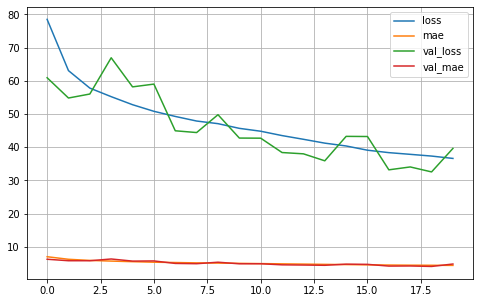

In [46]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()

plt.show()

In [47]:
X_new = X_test[:3]

In [49]:
y_pred = model.predict(X_new)
print (y_pred)


[[23.170937]
 [33.90714 ]
 [43.107765]]


In [50]:
print(y_test[:3])

51649     26.7
13864     42.2
124617    44.4
Name: Yield, dtype: float64


In [51]:
model.save("my_new_model.h5")

In [52]:
model = keras.models.load_model("my_new_model.h5")

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [54]:
y_pred = model.predict(X_new)
print (y_pred)

[[23.170937]
 [33.90714 ]
 [43.107765]]


In [55]:
del model

In [56]:
keras.backend.clear_session()

In [57]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [58]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [59]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['mae'])

In [60]:
model_history = model.fit(X_train, y_train, epochs=80, validation_data=(X_valid, y_valid))

Epoch 1/80
3209/3209 [==============================] - 7s 2ms/step - loss: 78.7865 - mae: 7.0907 - val_loss: 63.3944 - val_mae: 6.4130
Epoch 2/80
3209/3209 [==============================] - 8s 2ms/step - loss: 63.0580 - mae: 6.2735 - val_loss: 55.5807 - val_mae: 5.8235
Epoch 3/80
3209/3209 [==============================] - 8s 2ms/step - loss: 58.1410 - mae: 5.9548 - val_loss: 55.1353 - val_mae: 5.8316
Epoch 4/80
3209/3209 [==============================] - 7s 2ms/step - loss: 54.6550 - mae: 5.7141 - val_loss: 64.1685 - val_mae: 6.2571
Epoch 5/80
3209/3209 [==============================] - 8s 2ms/step - loss: 52.6413 - mae: 5.5605 - val_loss: 58.9675 - val_mae: 5.7194
Epoch 6/80
3209/3209 [==============================] - 7s 2ms/step - loss: 51.1927 - mae: 5.4328 - val_loss: 55.6705 - val_mae: 5.6140
Epoch 7/80
3209/3209 [==============================] - 7s 2ms/step - loss: 50.1767 - mae: 5.3661 - val_loss: 46.0634 - val_mae: 5.0853
Epoch 8/80
3209/3209 [==========================

Epoch 61/80
3209/3209 [==============================] - 7s 2ms/step - loss: 27.8564 - mae: 3.8216 - val_loss: 26.3152 - val_mae: 3.6094
Epoch 62/80
3209/3209 [==============================] - 483s 151ms/step - loss: 27.7897 - mae: 3.8170 - val_loss: 26.2852 - val_mae: 3.8148
Epoch 63/80
3209/3209 [==============================] - 27s 8ms/step - loss: 27.5500 - mae: 3.7874 - val_loss: 39.8566 - val_mae: 4.9462
Epoch 64/80
3209/3209 [==============================] - 8s 2ms/step - loss: 27.2380 - mae: 3.7806 - val_loss: 23.9628 - val_mae: 3.5883
Epoch 65/80
3209/3209 [==============================] - 8s 2ms/step - loss: 27.0358 - mae: 3.7660 - val_loss: 26.9020 - val_mae: 3.7495
Epoch 66/80
3209/3209 [==============================] - 8s 2ms/step - loss: 27.1567 - mae: 3.7617 - val_loss: 25.1942 - val_mae: 3.6759
Epoch 67/80
3209/3209 [==============================] - 8s 3ms/step - loss: 26.5452 - mae: 3.7241 - val_loss: 23.6041 - val_mae: 3.5064
Epoch 68/80
3209/3209 [=============

In [61]:
mae_test = model.evaluate(X_test, y_test)

1427/1427 [==============================] - 2s 2ms/step - loss: 21.6511 - mae: 3.3662


In [62]:
model_history.history

{'loss': [78.78650665283203,
  63.05802917480469,
  58.1410026550293,
  54.65496063232422,
  52.64132308959961,
  51.192657470703125,
  50.176700592041016,
  48.85599899291992,
  48.06574630737305,
  46.7626838684082,
  46.114356994628906,
  45.17718505859375,
  44.354156494140625,
  43.23453140258789,
  42.52106475830078,
  41.5554084777832,
  41.185665130615234,
  40.85099792480469,
  40.408504486083984,
  39.79179763793945,
  39.61853790283203,
  39.07716369628906,
  38.85865020751953,
  38.69924545288086,
  38.360565185546875,
  38.061790466308594,
  37.68997573852539,
  37.567848205566406,
  37.167110443115234,
  36.79217529296875,
  36.42302703857422,
  36.276947021484375,
  35.50210952758789,
  35.19583511352539,
  34.839202880859375,
  34.62636947631836,
  34.03653335571289,
  33.52890396118164,
  33.47868728637695,
  33.18065643310547,
  32.73583221435547,
  32.40469741821289,
  32.47383499145508,
  32.06214904785156,
  31.71904754638672,
  31.19980239868164,
  31.156898498535

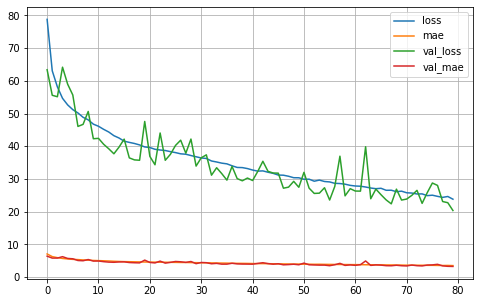

In [63]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()

plt.show()

In [64]:
model.save("my_Func_model.h5")

In [65]:
del model

In [67]:
keras.backend.clear_session()

In [45]:
model = keras.models.load_model("my_Func_model.h5")

In [46]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [48]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print (y_pred)

[[25.937105]
 [35.811985]
 [42.40579 ]]


In [49]:
y_test[:3]

51649     26.7
13864     42.2
124617    44.4
Name: Yield, dtype: float64

In [50]:
X_test[0]

array([-0.11927456,  0.00434749, -1.10499803, -0.4401284 ,  1.12482087,
        0.86011432, -1.07609788, -0.52140108])

In [53]:
y_test[0]

26.7

In [52]:
# Predicting the sigle observation results. look the observation number 102981
a = [-0.11927456,  0.00434749, -1.10499803, -0.4401284 ,  1.12482087,
        0.86011432, -1.07609788, -0.52140108]
b = np.array(a)
b = b.reshape(1, -1)
y_pred_single_obs = model.predict(b)
round(float(y_pred_single_obs), 2)


25.94

In [54]:
# Predicting the sigle observation results. look the observation number 102981
from sklearn.externals import joblib
Latitude = -0.11927456
Longitude= 0.00434749
ATMAX = -1.10499803
ATMIN = -0.4401284
humidity =1.12482087
pressure=0.86011432
tempmax=-1.07609788
tempmin=-0.52140108
pred_args = [Latitude,Longitude,ATMAX,ATMIN,humidity,pressure,tempmax,tempmin]
pred_args_arr = np.array(pred_args)
pred_args_arr = pred_args_arr.reshape(1, -1)
model_prediction = model.predict(pred_args_arr)

round(float(model_prediction), 2)

/home/kanhaiya/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


25.94